In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 25.9 MB/s 
     |████████████████████████████████| 895 kB 63.6 MB/s 
     |████████████████████████████████| 3.3 MB 32.5 MB/s 
     |████████████████████████████████| 596 kB 66.2 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import tensorflow as tf
import transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

model_name='cahya/bert-base-indonesian-522M'

In [ ]:
dataset = pd.read_csv("/content/Idiom-ta-dataset.csv")
dataset

,kalimat,kategori,frasa idiom
0,Tikus berdasi itu disidang dalam kasus tipikor.,kalimat_idiom,NaN
1,Anak kutu buku itu menjuarai lomba matematika ...,kalimat_idiom,NaN
2,Sepulang dari Surabaya kakak membawakan buah t...,kalimat_idiom,NaN
3,Miftah merupakan bintang kelas di kelasnya.,kalimat_idiom,NaN
4,Pemuda adalah tunas bangsa negeri ini.,kalimat_idiom,NaN
...,...,...,...
202,Ani bertemu Budi di stasiun kereta api.,kalimat_biasa,NaN
203,Siska bernyayi di atas panggung.,kalimat_biasa,NaN
204,Ika sangat rajin belajar.,kalimat_biasa,NaN
205,Eni sedang mencuci piring.,kalimat_biasa,NaN


In [ ]:
label_cat = {"kategori":{'kalimat_biasa' : 0, 'kalimat_idiom' : 1}}
dataset = dataset.replace(label_cat)
dataset

,kalimat,kategori,frasa idiom
0,Tikus berdasi itu disidang dalam kasus tipikor.,1,NaN
1,Anak kutu buku itu menjuarai lomba matematika ...,1,NaN
2,Sepulang dari Surabaya kakak membawakan buah t...,1,NaN
3,Miftah merupakan bintang kelas di kelasnya.,1,NaN
4,Pemuda adalah tunas bangsa negeri ini.,1,NaN
...,...,...,...
202,Ani bertemu Budi di stasiun kereta api.,0,NaN
203,Siska bernyayi di atas panggung.,0,NaN
204,Ika sangat rajin belajar.,0,NaN
205,Eni sedang mencuci piring.,0,NaN


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(train.shape)
print(test.shape)

(165, 3)
(42, 3)


In [ ]:
X_train =train.kalimat
X_test =test.kalimat
y_train = train.kategori
y_test = test.kategori 

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((165,), (42,), (165,))

In [ ]:
#define a tokenizer object
tokenizer = BertTokenizer.from_pretrained(model_name)

#tokenize the text (padding to max sequence in batch)
train_encodings = tokenizer(list(X_train.values), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test.values), truncation=True, padding=True)

#print the first paragraph and it transformation
print(f'First sentence: \'{X_train[:1]}\'')
print(f'Input ids: {train_encodings["input_ids"][0]}')
print(f'Attention mask: {train_encodings["attention_mask"][0]}')

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


First sentence: '86    Bapak polisi menerima uang panas dari pengenda...
Name: kalimat, dtype: object'
Input ids: [3, 5887, 4476, 2998, 3714, 3682, 1533, 20905, 1510, 9227, 1538, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


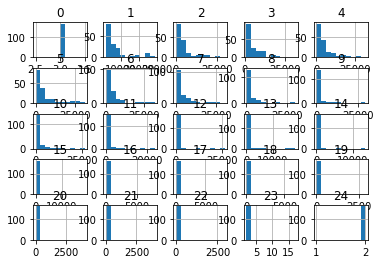

In [ ]:
pd.DataFrame(train_encodings["input_ids"]).hist();

In [ ]:
len(train_encodings["attention_mask"][0])

25

In [ ]:
train_encodings

{'input_ids': [[3, 5887, 4476, 2998, 3714, 3682, 1533, 20905, 1510, 9227, 1538, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 22987, 3854, 7876, 1495, 2677, 2882, 2935, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 8309, 2412, 8904, 1555, 2548, 4781, 2826, 11280, 9319, 1510, 3568, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 19965, 1675, 3037, 5468, 11135, 1793, 27462, 5222, 2177, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 25525, 2059, 18638, 3540, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 1695, 4151, 1519, 2192, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 1855, 14208, 11415, 7364, 2403, 8568, 1012, 8298, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 25309, 6347, 1566, 5755, 30797, 4356, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 1600, 2548, 2565, 26007, 3413, 5006, 1529, 5755, 1572, 18812, 4608, 2565, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 3245, 5366, 6014, 11186, 17, 1, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                                    list(y_train.values)))

test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings),
                                                    list(y_test.values)))

In [ ]:
train_dataset 

<TensorSliceDataset shapes: ({input_ids: (25,), token_type_ids: (25,), attention_mask: (25,)}, ()), types: ({input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [ ]:
BATCH_SIZE = 16
model = TFBertForSequenceClassification.from_pretrained(model_name)

optimizerr = tf.keras.optimizers.Adam(learning_rate=5e-5)
losss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # Computes the crossentropy loss between the labels and predictions. 
model.compile(optimizer=optimizerr,                                     
              loss=losss,
              metrics=['accuracy'])

model.fit(train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE), 
          epochs=3,
          batch_size=BATCH_SIZE)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-522M and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
11/11 [==============================] - 64s 4s/step - loss: 0.6825 - accuracy: 0.6121
Epoch 2/3
11/11 [==============================] - 43s 4s/step - loss: 0.2909 - accuracy: 0.8788
Epoch 3/3
11/11 [==============================] - 43s 4s/step - loss: 0.0880 - accuracy: 0.9636


In [ ]:
model.evaluate(test_dataset.shuffle(len(X_test)).batch(BATCH_SIZE), return_dict=True, batch_size=BATCH_SIZE)

3/3 [==============================] - 5s 749ms/step - loss: 0.5654 - accuracy: 0.8095


{'accuracy': 0.8095238208770752, 'loss': 0.5653549432754517}

# CLASSIFICATION

In [2]:
!pip install simpletransformers

     |████████████████████████████████| 248 kB 23.9 MB/s 
     |████████████████████████████████| 306 kB 79.1 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 1.7 MB 62.0 MB/s 
     |████████████████████████████████| 1.2 MB 58.6 MB/s 
     |████████████████████████████████| 6.8 MB 59.5 MB/s 
     |████████████████████████████████| 3.4 MB 37.2 MB/s 
     |████████████████████████████████| 9.3 MB 74.0 MB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 895 kB 66.8 MB/s 
     |████████████████████████████████| 596 kB 73.0 MB/s 
     |████████████████████████████████| 3.3 MB 60.5 MB/s 
     |████████████████████████████████| 142 kB 82.7 MB/s 
     |████████████████████████████████| 180 kB 82.5 MB/s 
     |████████████████████████████████| 97 kB 8.7 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 243 kB 60.1 MB/s 
     |████████████████

In [1]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
import logging
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, classification_report
#from pylab import rcParams
import matplotlib.pyplot as plt
import pickle

In [2]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [3]:
model_types = {
    "bert": "cahya/bert-base-indonesian-522M", 
    "roberta":"cahya/roberta-base-indonesian-522M"}
model_name = "bert"

In [4]:
dataset = pd.read_csv("/content/Idiom-ta-dataset.csv")
dataset

,kalimat,kategori,frasa idiom
0,Tikus berdasi itu disidang dalam kasus tipikor.,kalimat_idiom,NaN
1,Anak kutu buku itu menjuarai lomba matematika ...,kalimat_idiom,NaN
2,Sepulang dari Surabaya kakak membawakan buah t...,kalimat_idiom,NaN
3,Miftah merupakan bintang kelas di kelasnya.,kalimat_idiom,NaN
4,Pemuda adalah tunas bangsa negeri ini.,kalimat_idiom,NaN
...,...,...,...
202,Ani bertemu Budi di stasiun kereta api.,kalimat_biasa,NaN
203,Siska bernyayi di atas panggung.,kalimat_biasa,NaN
204,Ika sangat rajin belajar.,kalimat_biasa,NaN
205,Eni sedang mencuci piring.,kalimat_biasa,NaN


In [5]:
label_cat = {"kategori":{'kalimat_biasa' : 0, 'kalimat_idiom' : 1}}
dataset = dataset.replace(label_cat)
dataset

,kalimat,kategori,frasa idiom
0,Tikus berdasi itu disidang dalam kasus tipikor.,1,NaN
1,Anak kutu buku itu menjuarai lomba matematika ...,1,NaN
2,Sepulang dari Surabaya kakak membawakan buah t...,1,NaN
3,Miftah merupakan bintang kelas di kelasnya.,1,NaN
4,Pemuda adalah tunas bangsa negeri ini.,1,NaN
...,...,...,...
202,Ani bertemu Budi di stasiun kereta api.,0,NaN
203,Siska bernyayi di atas panggung.,0,NaN
204,Ika sangat rajin belajar.,0,NaN
205,Eni sedang mencuci piring.,0,NaN


In [6]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42, shuffle=True)

In [7]:
train.drop('frasa idiom', axis=1, inplace=True)
test.drop('frasa idiom', axis=1, inplace=True)

In [8]:
train.head()

,kalimat,kategori
86,Bapak polisi menerima uang panas dari pengenda...,1
202,Ani bertemu Budi di stasiun kereta api.,0
67,Permasalahan harus diselesaikan dengan kepala ...,1
82,Pencuri itu mengambil langkah seribu saat keta...,1
204,Ika sangat rajin belajar.,0


In [9]:
class_names = ['kalimat_biasa', 'kalimat_idiom']

In [10]:
# Optional model configuration
model_args = ClassificationArgs()
model_args.num_train_epochs = 5
model_args.train_batch_size = 16
model_args.eval_batch_size = 16
model_args.overwrite_output_dir = True
model_args.fp16 = True
model_args.do_lower_case = True

In [11]:
# Create a ClassificationModel
model = ClassificationModel(
    model_name, model_types[model_name], num_labels=len(class_names), args=model_args, use_cuda=False
)

Downloading:   0%|          | 0.00/468 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

In [12]:
# Train the model
model.train_model(train)


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/165 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_2_2


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/11 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/11 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/11 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/11 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/11 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(55, 0.2104910052635453)

In [13]:
result, model_outputs, wrong_predictions = model.eval_model(test)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/42 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_2_2


Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.7595062429158977, 'tp': 21, 'tn': 16, 'fp': 2, 'fn': 3, 'auroc': 0.9652777777777778, 'auprc': 0.9788286713286712, 'eval_loss': 0.32101601858933765}


In [14]:
preds = np.argmax(model_outputs, axis=1)

In [15]:
accuracy = np.sum(test['kategori']==preds)/len(preds)
accuracy

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


0.8809523809523809

In [16]:
predictions, raw_outputs = model.predict(['Anak kutu buku itu menjuarai lomba matematika.'])

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
class_names[int(predictions[0])]

'kalimat_idiom'

In [18]:
print(classification_report(list(test['kategori']), preds, target_names=class_names))

               precision    recall  f1-score   support

kalimat_biasa       0.84      0.89      0.86        18
kalimat_idiom       0.91      0.88      0.89        24

     accuracy                           0.88        42
    macro avg       0.88      0.88      0.88        42
 weighted avg       0.88      0.88      0.88        42



In [19]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True category')
    plt.xlabel('Predicted category');

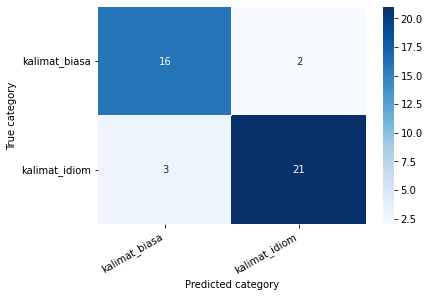

In [20]:
cm = confusion_matrix(list(test['kategori']), preds)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [21]:
def evaluation(y_true, y_pred):
    f1score = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')    
    cm = confusion_matrix(y_true, y_pred)    
    return f1score, recall, precision, cm

In [22]:
f1score, recall, precision, cm = evaluation(list(test['kategori']), preds)

In [23]:
print(" f1-score: {}\n precision: {}\n recall: {}".format(f1score, precision, recall))

 f1-score: 0.8792409430707303
 precision: 0.8775743707093822
 recall: 0.8819444444444444


model sudah disimpan outumatis ke dir outputs

In [24]:
import torch

In [37]:
PATH = '/content/model2.bin'

In [38]:
torch.save(model, PATH)

In [39]:
model1 = torch.load(PATH)

In [42]:
predictions, raw_outputs = model1.predict(['Ayah pergi ke kantor'])

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
class_names[int(predictions[0])]

'kalimat_biasa'

In [ ]:
# filename = 'model_1.pkl'
# pickle.dump(model.state_dict(), open(filename, 'wb'))

In [ ]:
# model2 = pickle.load(open(filename, 'rb'))